<a href="https://colab.research.google.com/github/VirajAgarwal1/Classifier/blob/main/ImgAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Augmentation**

In [ ]:
!unzip Trimmed\ Dataset.zip -d TrimBalanced\ Dataset

In [3]:
!find . -type f -iname \*.gif -delete

In [4]:
!pwd

/content


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise

In [7]:
data_dir = "./Trimmed Dataset/"

Total Images = 723
Number of Classes = 14


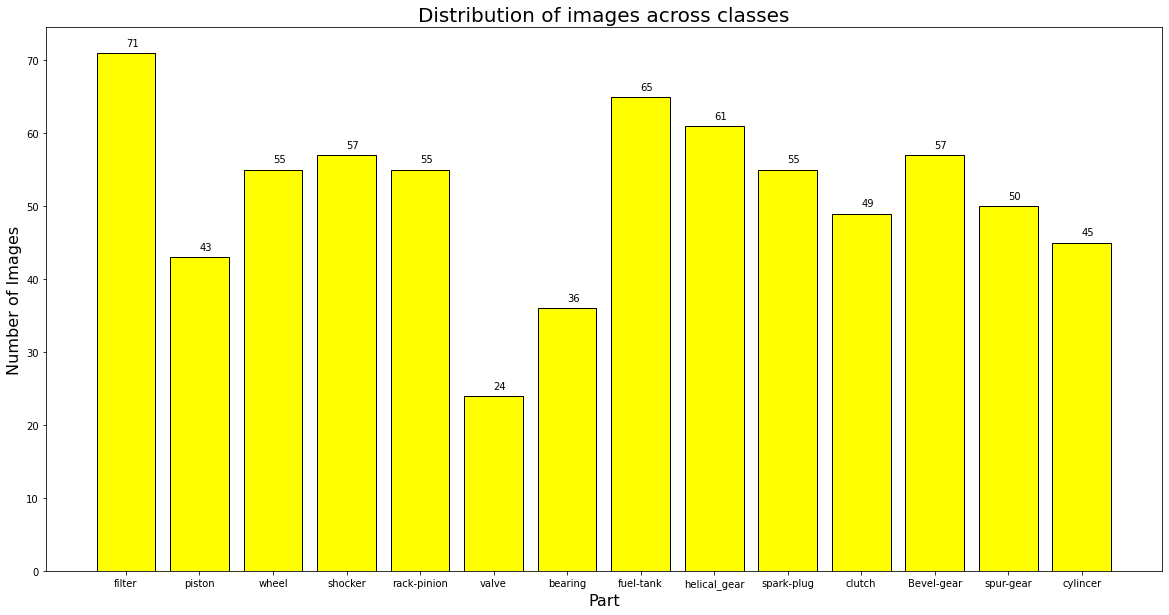

In [8]:
CLASSES = os.listdir(data_dir)
numImagesperClass = []
numImages = 0

for path in CLASSES:
    numImagesperClass.append(len(os.listdir(os.path.join(data_dir, path))))
    numImages += len(os.listdir(os.path.join(data_dir, path)))

print("Total Images = " + str(numImages))
print("Number of Classes = " + str(len(CLASSES)))

pos = np.arange(len(CLASSES))
plt.figure(figsize=(20,10))
plt.bar(pos, numImagesperClass, color="yellow", edgecolor="black")
plt.xticks(pos, CLASSES)
plt.xlabel('Part', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Distribution of images across classes',fontsize=20)

for i, v in enumerate(numImagesperClass):
    plt.text(i,v + 1, str(v))


plt.show()

In [9]:
def write_image(path, img):
    # img = img*(2**16-1)
    # img = img.astype(np.uint16)
    # img = img.astype(np.uint8)
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    cv2.imwrite(path, img)

In [10]:
classes = os.listdir(data_dir)

In [12]:
len(os.listdir("./TrimBalanced Dataset/Trimmed Dataset/Bevel-gear"))

57

In [13]:
new_data_dir = "./TrimBalanced Dataset/Trimmed Dataset"

for Imclass in classes:

    cur_dir = os.path.join(new_data_dir, Imclass)
    images_paths = os.listdir(os.path.join(data_dir, Imclass))
    numImgInClass = len(os.listdir(cur_dir))

    print("Started operation for " + Imclass + " class" ,end=" ... ")
    ImagesPerClass = 1000
    
    while numImgInClass < ImagesPerClass:
        
        img_path = os.path.join(data_dir, Imclass, images_paths[(ImagesPerClass - numImgInClass) % len(images_paths)])
        img = cv2.imread(img_path)
        img = rotate(img, angle=random.randrange(5,95,5))
        transform = AffineTransform(translation=(random.randrange(-10,10,1)))
        img = warp(img,transform, mode="wrap")
        img = random_noise(img)
        img = cv2.GaussianBlur(img, (3,3),0)
        dir = cur_dir + "/image " + str(ImagesPerClass-numImgInClass) + ".jpg"
        write_image(dir, img)
        numImgInClass+=1
    print("Completed operation for " + Imclass + " class")

Started operation for filter class ... Completed operation for filter class
Started operation for piston class ... Completed operation for piston class
Started operation for wheel class ... Completed operation for wheel class
Started operation for shocker class ... Completed operation for shocker class
Started operation for rack-pinion class ... Completed operation for rack-pinion class
Started operation for valve class ... Completed operation for valve class
Started operation for bearing class ... Completed operation for bearing class
Started operation for fuel-tank class ... Completed operation for fuel-tank class
Started operation for helical_gear class ... Completed operation for helical_gear class
Started operation for spark-plug class ... Completed operation for spark-plug class
Started operation for clutch class ... Completed operation for clutch class
Started operation for Bevel-gear class ... Completed operation for Bevel-gear class
Started operation for spur-gear class ... Co

Total Images = 14000
Number of Classes = 14


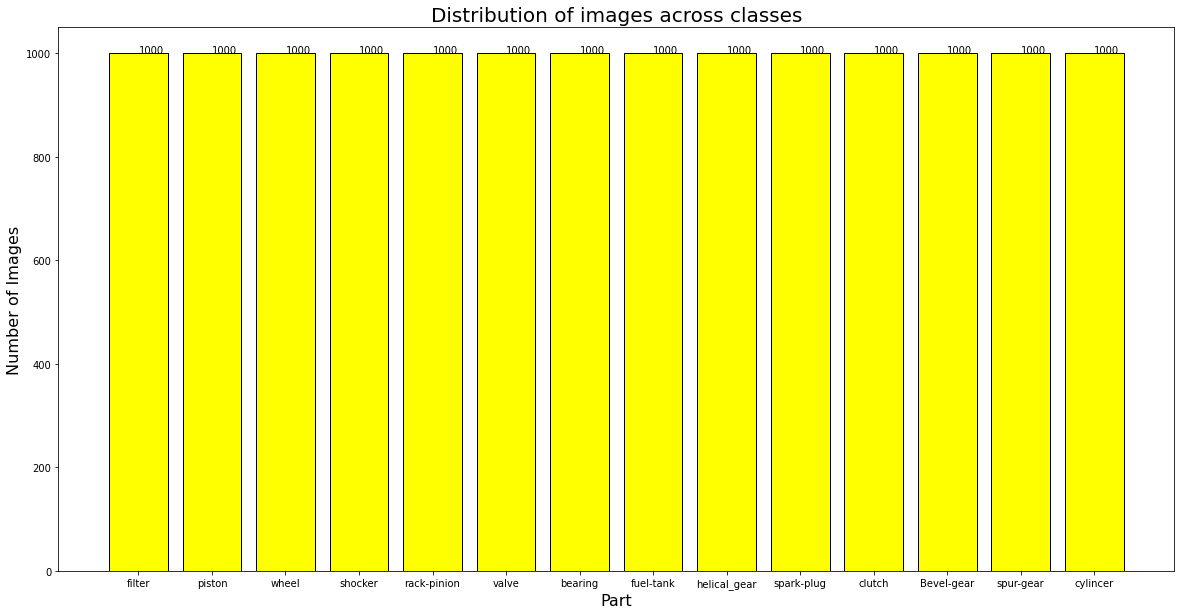

In [14]:
data_dir = new_data_dir
CLASSES = os.listdir(data_dir)
numImagesperClass = []
numImages = 0

for path in CLASSES:
    numImagesperClass.append(len(os.listdir(os.path.join(data_dir, path))))
    numImages += len(os.listdir(os.path.join(data_dir, path)))

print("Total Images = " + str(numImages))
print("Number of Classes = " + str(len(CLASSES)))

pos = np.arange(len(CLASSES))
plt.figure(figsize=(20,10))
plt.bar(pos, numImagesperClass, color="yellow", edgecolor="black")
plt.xticks(pos, CLASSES)
plt.xlabel('Part', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Distribution of images across classes',fontsize=20)

for i, v in enumerate(numImagesperClass):
    plt.text(i,v + 1, str(v))


plt.show()

In [ ]:
!zip -r ./TrimBalanced_Dataset_Zip.zip ./TrimBalanced\ Dataset

## **Custom CNN Classification**

In [ ]:
!pip install livelossplot

In [49]:
from keras.models import Sequential, load_model
from keras.layers import Activation, Conv2D, Dense, Dropout, GlobalAveragePooling2D, MaxPool2D , Flatten, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1_l2
from keras.optimizers import Adam, SGD, Adagrad, RMSprop, Adamax
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import InceptionV3
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


from livelossplot import PlotLossesKeras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import isdir, isfile, join

In [50]:
data_dir = './TrimBalanced Dataset/Trimmed Dataset'

img_width = 300
img_height = 300

EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.0001

IMAGE_SHAPE = (img_width, img_height)

In [51]:
datagen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    height_shift_range=0.3,
    width_shift_range=0.5,
    brightness_range=[0.1,0.9],
    rotation_range=90,
    validation_split=0.1,
    zoom_range=0.1
)

In [52]:
CLASSES = sorted(listdir(data_dir))
CLASSES

['Bevel-gear',
 'bearing',
 'clutch',
 'cylincer',
 'filter',
 'fuel-tank',
 'helical_gear',
 'piston',
 'rack-pinion',
 'shocker',
 'spark-plug',
 'spur-gear',
 'valve',
 'wheel']

In [53]:
train_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='training',
    shuffle=True,
    seed=116,
)

validation_gen = datagen.flow_from_directory(
    data_dir,
    color_mode="grayscale",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = CLASSES,
    subset='validation',
    shuffle=True,
    seed=116,
)

Found 12600 images belonging to 14 classes.
Found 1400 images belonging to 14 classes.


In [54]:
for X,y in train_gen:
    print(X.shape)
    print(y.shape)
    break

(32, 300, 300, 1)
(32, 14)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                      

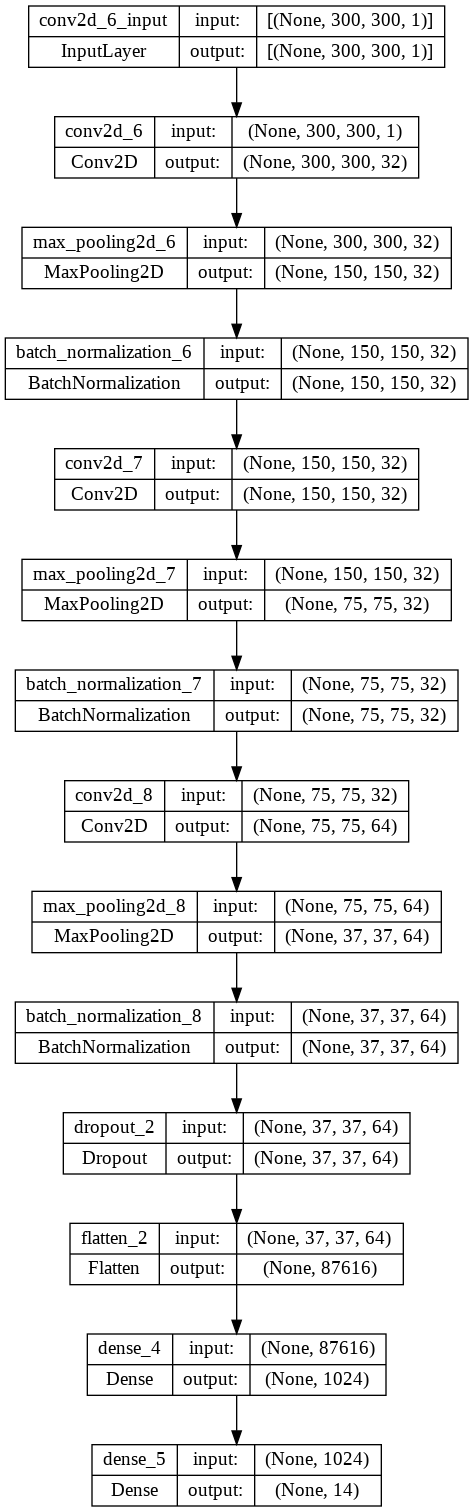

In [55]:
model = Sequential()

model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=( IMAGE_SHAPE+(1,) )))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(CLASSES), activation='softmax'))


model.summary()

plot_model(model, to_file='CNN_Final.png', show_shapes=True, show_layer_names=True)

In [56]:
model.save_weights("./CNN Model Data/InitialModel_CNN.h5")

In [57]:
steps_for_each_epoch = train_gen.samples // BATCH_SIZE
validation_steps_for_each_epoch = validation_gen.samples // BATCH_SIZE

In [58]:
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

model.load_weights("./CNN Model Data/InitialModel_CNN.h5")
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# File Path to store the trained models
filepath = "./CNN Model Data/Smaller lr/CNNmodel_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

## Early stopping to stop over training
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    callbacks=[early_stop, checkpoint1],
    verbose=True
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
393/393 [==============================] - ETA: 0s - loss: 3.0321 - accuracy: 0.1578
Epoch 1: val_accuracy improved from -inf to 0.07340, saving model to ./CNN Model Data/Smaller lr/CNNmodel_01-0.07.h5
393/393 [==============================] - 2074s 5s/step - loss: 3.0321 - accuracy: 0.1578 - val_loss: 9.8480 - val_accuracy: 0.0734
Epoch 2/20
393/393 [==============================] - ETA: 0s - loss: 2.3300 - accuracy: 0.2225
Epoch 2: val_accuracy improved from 0.07340 to 0.16497, saving model to ./CNN Model Data/Smaller lr/CNNmodel_02-0.16.h5
393/393 [==============================] - 2058s 5s/step - loss: 2.3300 - accuracy: 0.2225 - val_loss: 2.5900 - val_accuracy: 0.1650
Epoch 3/20
393/393 [==============================] - ETA: 0s - loss: 2.2057 - accuracy: 0.2631
Epoch 3: val_accuracy improved from 0.16497 to 0.23547, saving model to ./CNN Model Data/Smaller lr/CNNmodel_03-0.24.h5
393/393 [==============================] - 2068s 5s/step - loss: 2.2057 - accuracy: 0.263

KeyboardInterrupt: ignored

---

**After 3 epochs changing BATCH_SIZE from 32 to 16 to increase accuracy**

---

In [ ]:
LEARNING_RATE = 0.00003
EPOCHS = 3

OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

model.load_weights("./CNN Model Data/InitialModel_CNN.h5")
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# File Path to store the trained models
filepath = "./CNN Model Data/Smaller lr/CNNmodel_{epoch+4:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

## Early stopping to stop over training
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(
    train_gen, 
    epochs=EPOCHS, 
    steps_per_epoch=steps_for_each_epoch,
    validation_data=validation_gen,
    validation_steps=validation_steps_for_each_epoch,
    callbacks=[early_stop, checkpoint1],
    verbose=True
)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()